# PUI final exam 2021

## Theoretic part

## Question 1. 
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

**Ans** - **Option A**. This is a Supervised Learning problem. Since we have training samples (dependent variables - data with characteristics of street segments) with observed traffic amount (independent variable). This data can be split into training & test set (plus validation set, depending on number of samples available) to train a regression model. Regression is a type of Supervised Machine learning problem. 

## Question 2. 
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

**Ans. - Option C, D**

Since p-value for x1 is 0.03, which is < 0.05; we can reject the null hypothesis that a1=0 with 95% significance. However, for x2 & x3, we can reject null hypothesis that a2=0 and a3=0 with 70% and 85% significance level. (Hence Option C & D is correct)

For option B, based on the p-values, we cannot outright say that x2 & x3 are irrelevant, they are statistically insignificant at 95% significance level. We cannot comment about option A & E, based on the given information.

Hence Option C & D are correct.

## Question 3. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

**Ans. - Options D, E**

Overfitting occurs when the model learns very well on the training data (in-sample) but fails to generalize on out-of-sample (test/real-world) data. 

One of the reasons for overfitting is curse of dimensionality, where we have very few data points but number of features is much larger (high dimensionality). This causes ML models to saturate and make decisions based on insufficient evidence, leading to insufficient learning and overfitting. (Option D)

As stated, one sign of overfitting is model performing very well on training data (eg. high in-sample R-squared) but performing poorly on unseen/out-of-sample data. (Option E)

## Question 4. 
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%. (select all that apply)

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem? 

c) What would you expect the in-sample R2 to increase or decrease after that? What about the out-of-sample (test) R2?

**Ans.-**

a) Yes, I think the model is overfitting. The model fails to generalize on unseen data based on much lower out-of-sample R2 score (30%) compared to R2 score on training sample. I think adding more regressors would not help the model.

b) We have 100 regressors and only 1000 training samples. We also have 1000 testing samples. I would apply one or more of the following to tackle the problem of overfitting:
    
    1. Change the train-test split from 50% each to more of 80%-20% or 70%-30% split which would give me more training data
    
    2. Feature selection: Perhaps not all 100 regressors may be important. I would do a grid search to select subset of features that are important using p-value and R2-score of model on validation, which will help reduce dimensionality of the data.
    
    3. Cross validation during model training
    
c) The in-sample R2 score may or may not increase after this. However, I would expect the out-of-sample (test) R2-score to increase after this.

In [1]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC. 
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [2]:
# import and curate the dataset
TaxiRidership = pd.read_csv("LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("LGAFlightArrival.csv")

In [3]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [4]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [5]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')

In [6]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [7]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [8]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

In [9]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [10]:
FlightArrival.head()

,Date,arrivals
0,2018-01-01 00:00:00,3
1,2018-01-01 01:00:00,0
2,2018-01-01 02:00:00,1
3,2018-01-01 03:00:00,0
4,2018-01-01 04:00:00,0


## Task 1. Spatial visualization

### Q1(5+5pts extra credits) Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale.

In [11]:
taxi_location_df = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi_location_df = taxi_location_df.rename(columns={'location_i':'DOLocationID'})
taxi_location_df = taxi_location_df[['borough', 'DOLocationID','zone','geometry']]
taxi_location_df = taxi_location_df.drop_duplicates('DOLocationID')
taxi_location_df.head()

,borough,DOLocationID,zone,geometry
0,EWR,1.0,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [12]:
dow_ridership_df = TaxiRidership.groupby(['DOW','DOLocationID'])['vehicle_count'].sum().reset_index()

In [13]:
spatial_ridership_df = pd.merge(dow_ridership_df, taxi_location_df, on='DOLocationID')
spatial_ridership_df = gpd.GeoDataFrame(spatial_ridership_df)

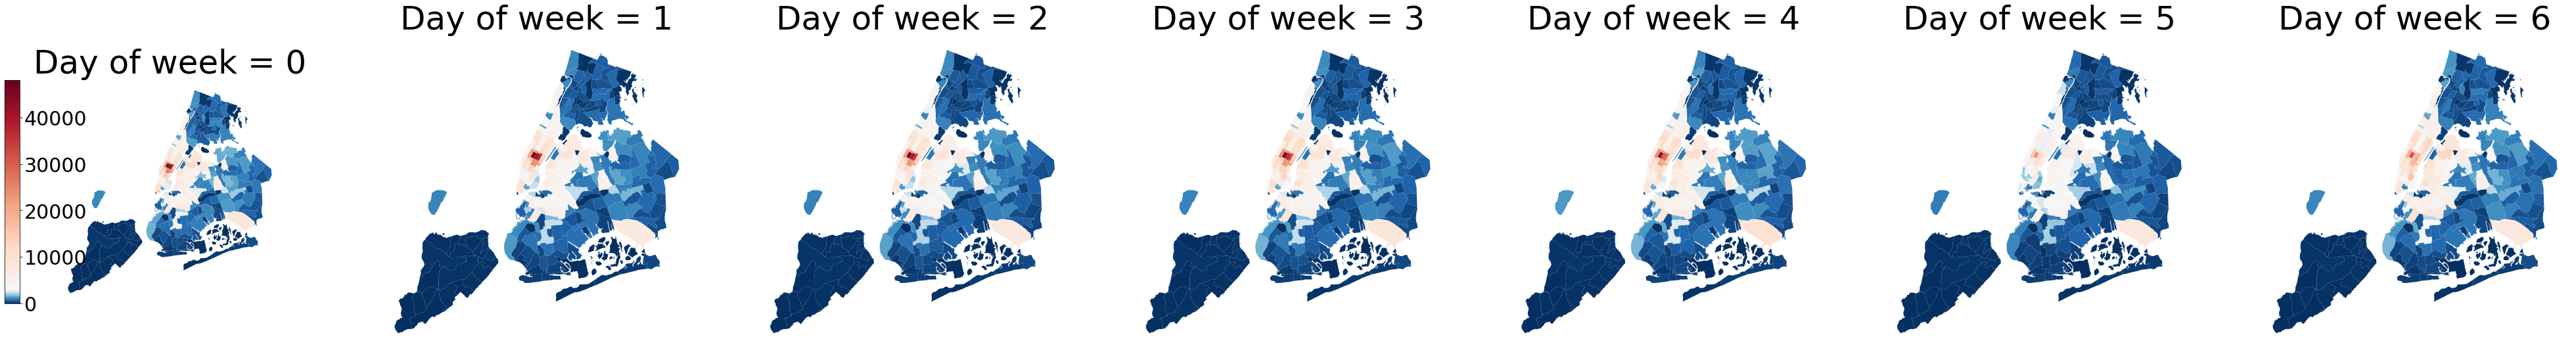

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
vmin, vmax, vcenter = spatial_ridership_df.vehicle_count.min(), spatial_ridership_df.vehicle_count.max(),spatial_ridership_df.vehicle_count.mean()
# get the max, min, mean values of the four series
norm_cmap = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
# define the max, min, and center of a color bar
cmap = 'RdBu_r' 
# generate a color bar
cbar = plt.cm.ScalarMappable(norm=norm_cmap, cmap=cmap) 
# apply predifined norm and colors to generate a color vector

# one legend for four figures
fig,ax = plt.subplots(1, 7,figsize=(70,20))  
for i in range(0, 7):
    spatial_ridership_df[spatial_ridership_df.DOW==i].plot(ax=ax[i],column='vehicle_count',cmap=cmap, 
                             norm=norm_cmap,legend=False)

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("left", size="5%", pad=0.05)
cb = fig.colorbar(cbar, cax=cax)
cb.ax.tick_params(labelsize=30)
# fig.tight_layout()
for i in range(0, 7):
    ax[i].set_title("Day of week = "+ str(i), fontsize=50)
    ax[i].axis('off')

### Scroll it to check all maps with one colormap scale.

## Task 2: Data preprocessing

### Q1 (3pts), aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data

In [15]:
TaxiRidership['timestamp'] = TaxiRidership['Date']
TaxiRidership['Date'] = TaxiRidership['Date'].dt.date

In [16]:
FlightArrival['Hour'] = FlightArrival['Date'].dt.hour
FlightArrival['timestamp'] = FlightArrival['Date']
FlightArrival['Date'] = FlightArrival['Date'].dt.date

In [17]:
agg_ridership_df = TaxiRidership.groupby(['Date','Hour'])['vehicle_count'].sum().reset_index()
merge_rider_df = pd.merge(agg_ridership_df, FlightArrival[['Date','Hour','arrivals']], on=['Date','Hour'])

### Q2(3pts), add time-lagged arrivals (1,2,3,4,5,6..12 hours before)

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only related to flight arrivals in the same hour, arrivals in 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the costume or wait for luggage. Please add lag add of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means add 1 hour lag value of arrivals. `iloc` function works as well.

In [18]:
merge_rider_df = merge_rider_df.sort_values(['Date','Hour'], ascending=True)
for i in range(1, 13):
    merge_rider_df['lag'+str(i)] = merge_rider_df.groupby(['Date'])['arrivals'].shift(i)

In [ ]:
## Impute Nan values with 0
# merge_rider_df = merge_rider_df.fillna(0)

In [19]:
merge_rider_df.isna().sum()

Date                0
Hour                0
vehicle_count       0
arrivals            0
lag1              365
lag2              730
lag3             1095
lag4             1460
lag5             1825
lag6             2190
lag7             2555
lag8             2920
lag9             3285
lag10            3650
lag11            4015
lag12            4380
dtype: int64

## Task 3. Data Exploration

### Q1 (3pts). Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [20]:
## Dataset characterisics using pandas inbuilt function
merge_rider_df.describe()

,Hour,vehicle_count,arrivals,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
count,8760.000000,8760.000000,8760.000000,8395.000000,8030.000000,7665.000000,7300.000000,6935.000000,6570.000000,6205.000000,5840.000000,5475.000000,5110.000000,4745.000000,4380.000000
mean,11.500000,619.968265,18.688699,18.699821,18.591034,18.256099,17.853836,17.351839,16.801979,16.127639,15.411130,14.561461,13.575342,12.510221,11.426484
std,6.922582,451.871984,13.332222,13.542965,13.737468,13.848326,13.907663,13.949203,13.991741,13.989409,13.999229,13.955015,13.828002,13.659462,13.554549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,81.750000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.500000,684.000000,23.000000,23.000000,23.000000,23.000000,22.000000,22.000000,21.000000,19.000000,17.000000,13.000000,7.000000,4.000000,3.000000
75%,17.250000,988.000000,30.000000,31.000000,31.000000,31.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,28.000000,27.000000,26.000000
max,23.000000,2028.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000


In [21]:
## 1. Total number of records in data
print("Total number of records in the dataset: ", merge_rider_df.shape[0])

Total number of records in the dataset:  8760


In [22]:
## 2. Total number of FHV & Taxi trips in data
print("Total number of FHV & Taxi trips in the dataset: ", merge_rider_df['vehicle_count'].sum())

Total number of FHV & Taxi trips in the dataset:  5430922.0


In [23]:
## 3. Total number of arrivals in data
print("Total number of arriving flights in the dataset: ", merge_rider_df['arrivals'].sum())

Total number of arriving flights in the dataset:  163713


### Q2 (8pts, 4 pts for the figure, 4 pts for the t-test). Plot a probability distribution function of hourly ridership volume on weekdays and weekend, and apply t-test to check is there a significant difference of hourly ridership between each day of week and the rest days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [24]:
merge_rider_df['DOW'] = pd.to_datetime(merge_rider_df.Date).dt.dayofweek

In [25]:
weekend_hourly_ridership_df = merge_rider_df[merge_rider_df.DOW.isin([5,6])]
weekday_hourly_ridership_df = merge_rider_df[~merge_rider_df.DOW.isin([5,6])]

weekend_hourly_ridership_df['norm_vehicle_count'] = (weekend_hourly_ridership_df['vehicle_count'] - weekend_hourly_ridership_df['vehicle_count'].mean())/weekend_hourly_ridership_df['vehicle_count'].std()
weekday_hourly_ridership_df['norm_vehicle_count'] = (weekday_hourly_ridership_df['vehicle_count'] - weekday_hourly_ridership_df['vehicle_count'].mean())/weekday_hourly_ridership_df['vehicle_count'].std()

<ipython-input-25-398341bd0f96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_hourly_ridership_df['norm_vehicle_count'] = (weekend_hourly_ridership_df['vehicle_count'] - weekend_hourly_ridership_df['vehicle_count'].mean())/weekend_hourly_ridership_df['vehicle_count'].std()
<ipython-input-25-398341bd0f96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_hourly_ridership_df['norm_vehicle_count'] = (weekday_hourly_ridership_df['vehicle_count'] - weekday_hourly_ridership_df['vehicle_count'].m

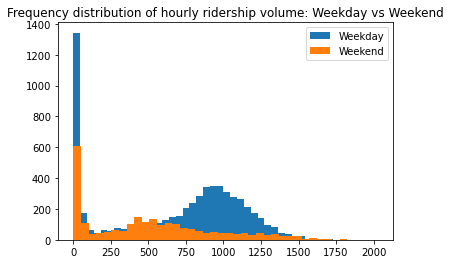

In [26]:
from scipy.stats import norm
import seaborn as sns
plt.hist(weekday_hourly_ridership_df['vehicle_count'], bins=40, label='Weekday')
plt.hist(weekend_hourly_ridership_df['vehicle_count'], bins=40, label='Weekend')
plt.title("Frequency distribution of hourly ridership volume: Weekday vs Weekend")
plt.legend()
plt.show()

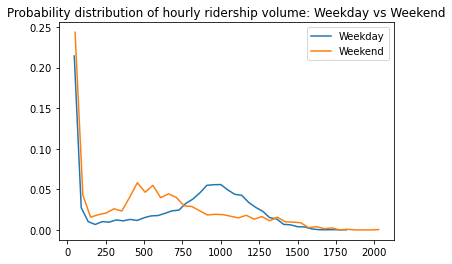

In [27]:
# getting data of the histogram
count_wd, bins_count_wd = np.histogram(weekday_hourly_ridership_df['vehicle_count'], bins=40)
count_we, bins_count_we = np.histogram(weekend_hourly_ridership_df['vehicle_count'], bins=40)
  
# finding the PDF of the histogram using count values
pdf_wd = count_wd / sum(count_wd)
pdf_we = count_we / sum(count_we)

# plotting PDF
plt.plot(bins_count_wd[1:], pdf_wd, label='Weekday')
plt.plot(bins_count_we[1:], pdf_we, label='Weekend')
plt.title("Probability distribution of hourly ridership volume: Weekday vs Weekend")
plt.legend()
plt.show()

In [28]:
day_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

hypothesis_df = {'index':[],'result':[]}
for x in merge_rider_df.DOW.unique():
    hypothesis_df['index'].append(day_map[x])
    
    t_test_results = stats.ttest_ind(merge_rider_df[merge_rider_df.DOW==x]['vehicle_count'],
                                     merge_rider_df[merge_rider_df.DOW!=x]['vehicle_count'])
    
    if t_test_results.pvalue < 0.05:
        hypothesis_df['result'].append(True)
    else:
        hypothesis_df['result'].append(False)
hypothesis_df = pd.DataFrame(hypothesis_df).set_index('index')
hypothesis_df

,result
index,
Monday,True
Tuesday,False
Wednesday,False
Thursday,True
Friday,True
Saturday,True
Sunday,False


### Q3(10pts, 3 pts for locate the correct month, 7 pts for the figure.) .  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

In [29]:
merge_rider_df['Month'] = pd.to_datetime(merge_rider_df['Date']).dt.month

In [30]:
merge_rider_df.groupby(['Month'])['vehicle_count'].sum().reset_index().sort_values(['vehicle_count'], ascending=False)

,Month,vehicle_count
9,10,507190.0
10,11,499905.0
4,5,497572.0
5,6,479624.0
7,8,468856.0
8,9,456470.0
3,4,455743.0
11,12,454425.0
6,7,439348.0
2,3,419679.0


### Ans: The month with highest taxi ridership is October with total vehicle count = 507190

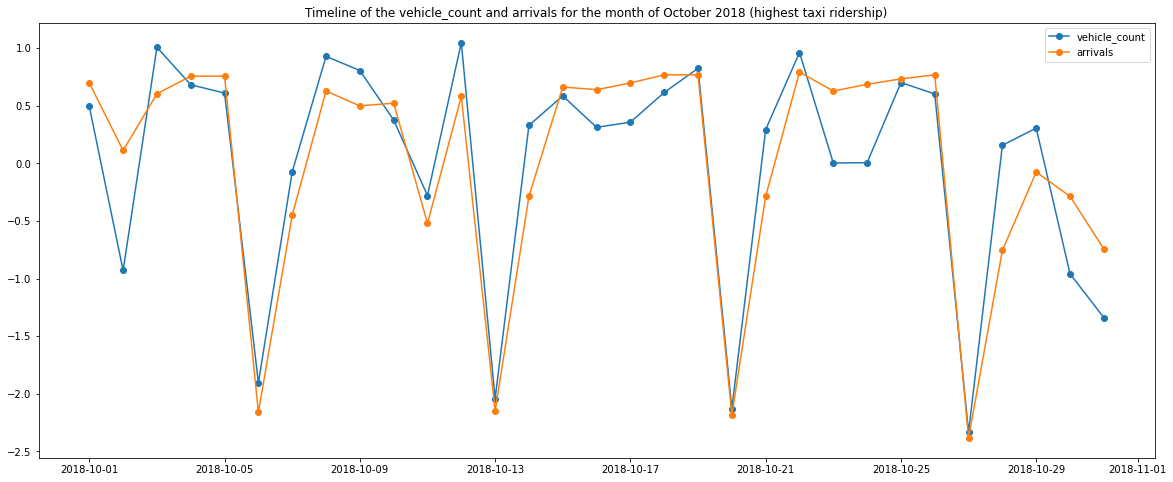

In [31]:
oct_ridership_timeline = merge_rider_df[merge_rider_df.Month==10].groupby(['Date'])['vehicle_count'].sum().reset_index()
oct_ri_mean, oct_ri_std = oct_ridership_timeline['vehicle_count'].mean(), oct_ridership_timeline['vehicle_count'].std()
oct_ridership_timeline['vehicle_count'] = oct_ridership_timeline['vehicle_count'].apply(lambda x: (x-oct_ri_mean)/oct_ri_std)

oct_arrival_timeline = merge_rider_df[merge_rider_df.Month==10].groupby(['Date'])['arrivals'].sum().reset_index()
oct_arr_mean,oct_arr_std = oct_arrival_timeline['arrivals'].mean(), oct_arrival_timeline['arrivals'].std()
oct_arrival_timeline['arrivals'] = oct_arrival_timeline['arrivals'].apply(lambda x: (x-oct_arr_mean)/oct_arr_std)

plt.figure(figsize=(20, 8))
plt.plot(oct_ridership_timeline.Date, oct_ridership_timeline.vehicle_count, 'o-',label='vehicle_count')
plt.plot(oct_arrival_timeline.Date, oct_arrival_timeline.arrivals, 'o-',label='arrivals')
plt.title("Timeline of the vehicle_count and arrivals for the month of October 2018 (highest taxi ridership)")
plt.legend()
plt.show()

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data

### Q1 (3pts). split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [32]:
train_ind, valid_ind, test_ind =sorted(merge_rider_df['Date'].unique())[:90], sorted(merge_rider_df['Date'].unique())[90:270], sorted(merge_rider_df['Date'].unique())[-90:]


train_data = merge_rider_df[merge_rider_df.Date.isin(train_ind)]
valid_data = merge_rider_df[merge_rider_df.Date.isin(valid_ind)]
test_data = merge_rider_df[merge_rider_df.Date.isin(test_ind)]
print(train_data.shape, valid_data.shape, test_data.shape)

(2160, 18) (4320, 18) (2160, 18)


### Q2 (10pts, 6 pts for modeling, 2 pts for the confidence interval, 2 pts for the figure.). 

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for arrival. What does it indicate? Report the 99% confidence interval for arrival's coefficient. Scatter plot for taxi ridership and flight arrival, include the predictive line from linear regression report.

In [33]:
lm = smf.ols(formula='vehicle_count~arrivals', data = train_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5657.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:08:10   Log-Likelihood:                -14690.
No. Observations:                2160   AIC:                         2.938e+04
Df Residuals:                    2158   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8315      7.772      9.757      0.0

***We get an R2-score of 0.724 by training an OLS model with 'arrivals' as a sole predictor. We get a p-value = 0.0 for 'arrivals' feature. This implies 'arrivals' feature is statistically significant in the model built for predicting the 'vehicle_count'.***

In [34]:
lm.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,55.794760,95.868142
arrivals,25.382394,27.184322


**99% confidence interval for arrival's coefficient = (25.382394, 27.184322)**

No handles with labels found to put in legend.


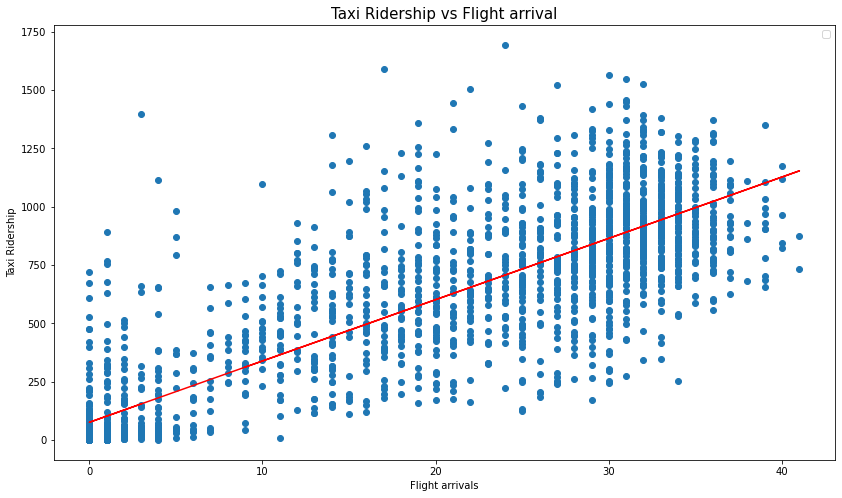

In [35]:
#Visualizing the regression fit
plt.figure(figsize=(14,8))
plt.plot(train_data['arrivals'], train_data['vehicle_count'], 'o')
plt.title('Taxi Ridership vs Flight arrival', fontsize = 15)
plt.xlabel('Flight arrivals')
plt.ylabel('Taxi Ridership')
plt.plot(train_data['arrivals'], lm.predict(), '-r')
plt.legend()

### Q3 (8pts): Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?


In [36]:
formula= 'vehicle_count~arrivals'
for i in range(1,13):
    formula += '+lag'+str(i)
    
print("Engineered formula: ", formula)

Engineered formula:  vehicle_count~arrivals+lag1+lag2+lag3+lag4+lag5+lag6+lag7+lag8+lag9+lag10+lag11+lag12


In [37]:
lm_lag_regressors = smf.ols(formula=formula, data = train_data).fit()
print(lm_lag_regressors.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     188.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          3.50e-265
Time:                        03:08:28   Log-Likelihood:                -7010.8
No. Observations:                1080   AIC:                         1.405e+04
Df Residuals:                    1066   BIC:                         1.412e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.6576     17.127      4.826      0.0

**Q - Which of the variables have a statistically significant impact according to p-values?**

**Ans-** Based on the OLS regression and the p-values for 'arrivals' feature and 12 'lag' features, we see that following variables have statistically significant impact (p-value < 0.05) on regression:
    
    1. 'arrivals'
    
    2. 'lag1'
    
    3. 'lag2'
    
    4. 'lag3'
    
    5. 'lag7' 
    
    6. 'lag8' 
    
    7. 'lag9' 
    
    8. 'lag10'
    
    9. 'lag11'
    
    10. 'lag12'
    
lag4, lag5 and lag6 do not have statistically significant impact.

### Q4(5pt): Incorporate Temporal Patterns 

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values. 

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [38]:
train_data_cat = pd.get_dummies(train_data, columns=['Hour','DOW'])
valid_data_cat = pd.get_dummies(valid_data, columns=['Hour','DOW'])
test_data_cat = pd.get_dummies(test_data, columns=['Hour','DOW'])

In [39]:
formula= 'vehicle_count~arrivals'
for i in range(1,13):
    formula += '+lag'+str(i)

for i in range(0, 24):
    formula += '+Hour_'+str(i)
    
for i in range(0, 7):
    formula += '+DOW_'+str(i)
    
print("Engineered formula: ", formula)

Engineered formula:  vehicle_count~arrivals+lag1+lag2+lag3+lag4+lag5+lag6+lag7+lag8+lag9+lag10+lag11+lag12+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6


In [40]:
lm_cat_regressors = smf.ols(formula=formula, data = train_data_cat).fit()
print(lm_cat_regressors.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     121.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          2.81e-316
Time:                        03:10:21   Log-Likelihood:                -6846.0
No. Observations:                1080   AIC:                         1.375e+04
Df Residuals:                    1049   BIC:                         1.391e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.0059     14.764      7.383      0.0

### Q5 (8pts, no penalty if students got different results, but no points if students failed to complete 12 models). Perform feature selection for lag variables
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [41]:
formula= 'vehicle_count~arrivals'
for i in range(0, 24):
    formula += '+Hour_'+str(i)
    
for i in range(0, 7):
    formula += '+DOW_'+str(i)

TrainR2={}
ValidR2={}
best_lag_models={}
print("Reporting training & out-of-sample R2 over the validation sample as the function of m")
for m in range(1,13):
    formula += '+lag'+str(m)
    best_lag_models[m] = smf.ols(formula=formula, data = train_data_cat).fit()
    ValidR2[m]=1-((best_lag_models[m].predict(valid_data_cat)-valid_data_cat.vehicle_count)**2).sum()/((valid_data_cat.vehicle_count-valid_data_cat.vehicle_count.mean())**2).sum()
    TrainR2[m]=best_lag_models[m].rsquared
    print("Lag amount = {}; Training R2-score = {}; Out-of-sample Validation R2-score = {}".format(m, TrainR2[m], ValidR2[m]))

Reporting training & out-of-sample R2 over the validation sample as the function of m
Lag amount = 1; Training R2-score = 0.9052384485244532; Out-of-sample Validation R2-score = 0.8717773725533059
Lag amount = 2; Training R2-score = 0.9037465218518803; Out-of-sample Validation R2-score = 0.889456070292267
Lag amount = 3; Training R2-score = 0.8960905817946461; Out-of-sample Validation R2-score = 0.8921101767399373
Lag amount = 4; Training R2-score = 0.8843288135833482; Out-of-sample Validation R2-score = 0.8926403637600919
Lag amount = 5; Training R2-score = 0.8674482349652396; Out-of-sample Validation R2-score = 0.8931121998375358
Lag amount = 6; Training R2-score = 0.8414406830237909; Out-of-sample Validation R2-score = 0.893651706390706
Lag amount = 7; Training R2-score = 0.7986315841284974; Out-of-sample Validation R2-score = 0.894720614771405
Lag amount = 8; Training R2-score = 0.7606490277073255; Out-of-sample Validation R2-score = 0.8986684257133806
Lag amount = 9; Training R2-s

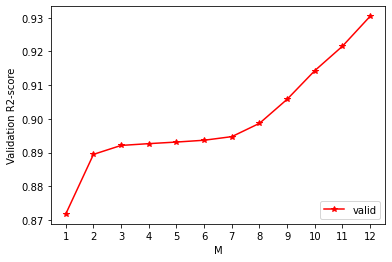

In [42]:
plt.plot(ValidR2.keys(),ValidR2.values(),'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('Validation R2-score')
plt.xticks(list(ValidR2.keys()))
plt.legend(loc='lower right')

In [43]:
optimal_M = np.argmax(list(ValidR2.values()))+1
optimal_M

12

In [44]:
## Assessing the model performance on Test-set sample
TestR2=1-((best_lag_models[optimal_M].predict(test_data_cat)-test_data_cat.vehicle_count)**2).sum()/((test_data_cat.vehicle_count-test_data_cat.vehicle_count.mean())**2).sum()
print("Test set R2-score: ", TestR2)

Test set R2-score:  0.8907589192750635


**Evaluate the final regression over the test sample.**

**R2-score on test sample = 0.8084508431124622**

### Q6 (9pts, 3 pts for each figure). Visualize temporal patterns and lag impacts through bar plots
For the best regression above, visualize:
- bar plot of hour vs its impact coefficient
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

In [45]:
best_model_coeff = best_lag_models[optimal_M].params.reset_index().rename(columns={'index':'feature',0:'coefficient'})

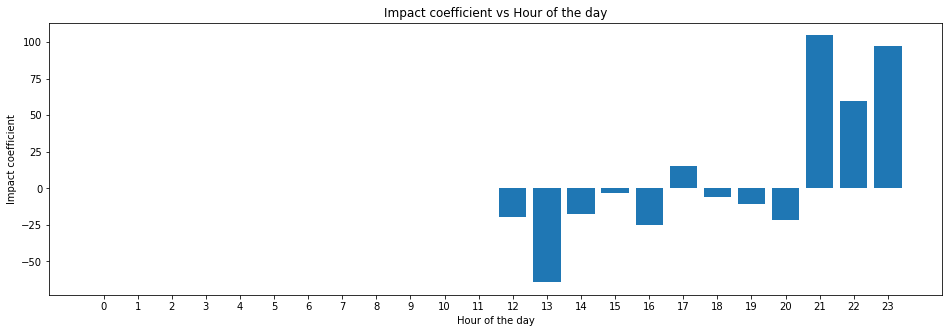

In [46]:
## 1. bar plot of hour vs impact coefficients
plt.figure(figsize=(16, 5))
plt.bar(range(0,24), best_model_coeff[best_model_coeff.feature.isin(['Hour_0','Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9',
       'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15',
       'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21',
       'Hour_22', 'Hour_23'])]['coefficient'])
plt.xticks(range(0,24))
plt.title("Impact coefficient vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Impact coefficient')
plt.show()

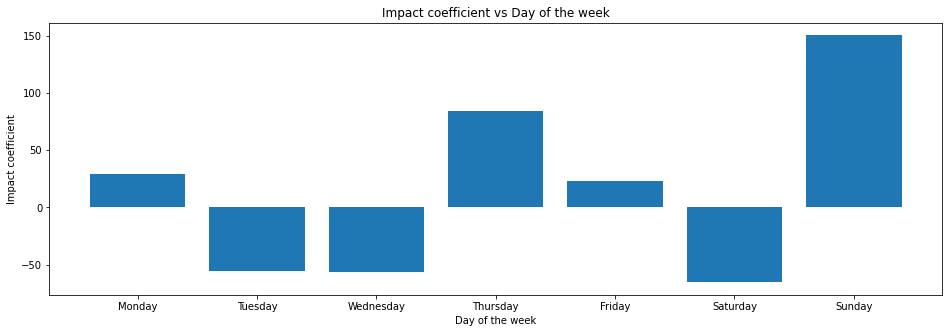

In [47]:
## 2. bar plot of day of the week vs impact coefficients
plt.figure(figsize=(16, 5))
plt.bar(list(day_map.values()), best_model_coeff[best_model_coeff.feature.isin(['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4',
       'DOW_5', 'DOW_6'])]['coefficient'])
plt.title("Impact coefficient vs Day of the week")
plt.xlabel('Day of the week')
plt.ylabel('Impact coefficient')
plt.show()

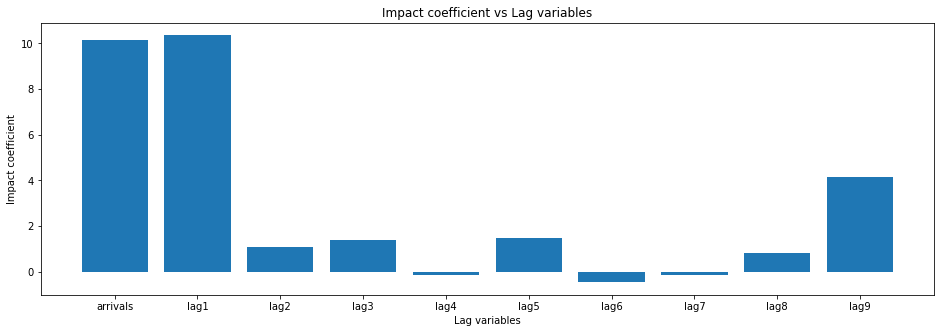

In [48]:
## 3. bar plot of lags vs impact coefficients
plt.figure(figsize=(16, 5))
plt.bar(['arrivals','lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag7', 'lag8', 'lag9'], best_model_coeff[best_model_coeff.feature.isin(['arrivals','lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
       'lag7', 'lag8', 'lag9'])]['coefficient'])
plt.title("Impact coefficient vs Lag variables")
plt.xlabel('Lag variables')
plt.ylabel('Impact coefficient')
plt.show()

## Task 5. Cluster the days of the year based on the relative timeline of their taxi departures from the airport

### Q1 (3pts). From the entire `dataset`, create a dataframe with days as rows, hours as columns, and taxi ridership as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership

In [ ]:
cluster_data = merge_rider_df.pivot_table(index='Date', columns='Hour', values='vehicle_count')

## Normalize data by total daily ridership
cluster_data['Total_daily_ridership'] = cluster_data.sum(axis=1)
for col in range(24):
    cluster_data[col] = cluster_data[col]/cluster_data['Total_daily_ridership']

cluster_data = cluster_data.drop(columns=['Total_daily_ridership'])
cluster_data.head()

### Q2 (8pts, no penalty if students got different results, but no points if the silhoutte score from different clusters are missing). Try K-means with different numbers of clusters k=2..7, reporting average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [ ]:
silho_score_trial = []
for n_clusters in range(2, 8): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = km.fit_predict(cluster_data)
    
    #report average Silhouette score
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    silho_score_trial.append(silhouette_avg)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

In [ ]:
plt.plot(range(2,8), silho_score_trial, 'ro-')
plt.title("Average silhouette score vs number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Avg.silhouette score")
plt.show()

**The average silhouette_score is maximum for n_clusters = 4, where the average silhouette_score is :0.23640741419204103. Hence from Silhouette's standpoint k=4 is optimal**

### Q3 (10pts, 3 pts for data processing, 7 for the pivot table). Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that? Visualize the aggregated hourly timeline over all the days within each cluster.
Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above. Also, use the pivot table to collect total riders per hour of the day within each cluster for further visualization (after appropriate normalization by the grand total).

In [ ]:
km = KMeans(n_clusters=4, random_state=99)
cluster_labels = km.fit_predict(cluster_data)

In [ ]:
cluster_num_dates = {}
for i in range(len(cluster_data)):
    cluster_num_dates[cluster_data.index[i]] = cluster_labels[i]

cluster_data = cluster_data.reset_index()
cluster_data['cluster'] = cluster_data['Date'].apply(lambda x: cluster_num_dates[x])
merge_rider_df['cluster'] = merge_rider_df['Date'].apply(lambda x: cluster_num_dates[x])

In [ ]:
dow_cluster_pt = merge_rider_df.pivot_table(index='cluster',columns='DOW', values='Date',aggfunc=pd.Series.nunique).fillna(0).reset_index()
dow_cluster_pt

In [ ]:
dow_cluster_pt['Total'] = dow_cluster_pt.sum(axis=1)
for i in range(0, 7):
    dow_cluster_pt[i] = np.round(dow_cluster_pt[i]/dow_cluster_pt['Total'],3)
dow_cluster_pt

**Q - How would you interpret the clusters based on that?**

**Ans -** Based on the distribution of number of occurrences of each day of the week within each of the clusters, we can infer that: 

    1. Cluster 0 - Weekday cluster, has majority records from Monday - Friday.

    2. Cluster 1 - Saturday cluster, has majority records (78.4%) in this cluster from "Saturday"

    3. Cluster 2 - Sunday cluster, has majority records (61.2%) in this cluster from "Sunday" 

    4. Cluster 3 - "Non-Sunday" cluster, This cluster has records spread out across Monday to Saturday, but no Sunday.

In [ ]:
## use the pivot table to collect total riders per hour of the day within each cluster for further visualization (after appropriate normalization by the grand total).

rider_cluster_pt = merge_rider_df.pivot_table(index='cluster',columns='Hour', values='vehicle_count',aggfunc='sum').fillna(0)

## Normalize data by total riders across the year & Visualize
rider_cluster_norm_total = rider_cluster_pt.copy()
for i in range(24):
    rider_cluster_norm_total[i] = rider_cluster_norm_total[i]/merge_rider_df.vehicle_count.sum()

rider_cluster_norm_total = rider_cluster_norm_total.T

plt.figure(figsize=(24, 8))
for i in range(4):
    plt.plot(rider_cluster_norm_total[i].values, 'o-',label='Cluster: '+str(i))
plt.legend()
plt.xticks(range(24))
plt.xlabel('Hour of the day', fontdict={'fontsize':20})
plt.ylabel('Vehicle count (normalized by total of data)', fontdict={'fontsize':20})
plt.title('Aggregated hourly timeline over all the days within each cluster normalized by total ridership in 2018', fontdict={'fontsize':20})
plt.show()
    

### Q4(4pts) visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.by total riderships in the cluster.

In [ ]:
## Normalize data by total ridership within cluster & Visualize
rider_cluster2 = rider_cluster_pt.copy()
rider_cluster2['Total_ridership'] = rider_cluster2.sum(axis=1)
for i in range(24):
    rider_cluster2[i] = rider_cluster2[i]/rider_cluster2['Total_ridership']

rider_cluster2 = rider_cluster2.drop(columns=['Total_ridership'])
rider_cluster2 = rider_cluster2.T

plt.figure(figsize=(24, 8))
for i in range(4):
    plt.plot(rider_cluster2[i].values, 'o-',label='Cluster: '+str(i))
plt.legend()
plt.xticks(range(24))
plt.xlabel('Hour of the day', fontdict={'fontsize':20})
plt.ylabel('Vehicle count (cluster-normalized)', fontdict={'fontsize':20})
plt.title('Aggregated hourly timeline over all the days within each cluster normalized by cluster ridership', fontdict={'fontsize':20})
plt.show()
    